# Data Science, Classification Analysis 

## Data Cleaning, Feature Engineering, Imputation, and Classification.



## Packages Import

These are all the packages we'll be using. Importing individual libraries make it easy for us to use them without having to call the parent libraries.

In [1]:
# Data Manipulation 
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D
import math
import time
import datetime
import tempfile

# Feature Selection and Encoding
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning 
import sklearn.ensemble as ske
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
import random

# Grid and Random Search
import scipy.stats as st
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Metrics
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc

# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

# Plot the Figures Inline
%matplotlib inline

## Objective

In this Jupyter Notepad, we will using a Telecommunications Customer Churn Dataset to predict whether an individual's will leave the service based in a series of parameters.

The dataset can be found here: https://www.kaggle.com/blastchar/telco-customer-churn/downloads/telco-customer-churn.zip/1

## Data Download and Loading

Let's download the data and save it to a folder in our local directory called 'dataset'. Download it once, and then comment the code out for subsequent runs.

After downloading the data, we load it directly from Disk into a Pandas Dataframe in Memory. Depending on the memory available to the Docker instance, this may be a problem.

The data comes separated into the Training and Test datasets. We will join the two for data exploration, and then separate them again before running our algorithms.

In [2]:
# Load Full Dataset

telco_customer_churn = pd.read_csv('/home/rfernandes/Documents/Kaggle/Telco_Customer_Churn/Telco-Customer-Churn.csv')

## Quick Data Exploration - Univariate

When exploring our dataset and its features, we have many options available to us. We can explore each feature individually, or compare pairs of features, finding the correlation between. Let's start with some simple Univariate (one feature) analysis.

Features can be of multiple types:
- **Nominal:**  is for mutual exclusive, but not ordered, categories.
- **Ordinal:** is one where the order matters but not the difference between values.
- **Interval:** is a measurement where the difference between two values is meaningful.
- **Ratio:** has all the properties of an interval variable, and also has a clear definition of 0.0.

There are multiple ways of manipulating each feature type, but for simplicity, we'll define only two feature types:
- **Numerical:** any feature that contains numeric values.
- **Categorical:** any feature that contains categories, or text.

In [3]:
# Check all Columns
telco_customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Data Types
telco_customer_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
# Describing all the Numerical Features
telco_customer_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
# Describing all the Categorical Features
telco_customer_churn.describe(include=['O'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7815-PDTHL,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [7]:
# TotalCharges Column it's a object not a number, we need to convert it
telco_customer_churn['TotalCharges'] = pd.to_numeric(telco_customer_churn['TotalCharges'], errors='coerce')
telco_customer_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [8]:
# Check how many NaN exist on the Dataframe
telco_customer_churn.isnull().sum().sum()

11

In [9]:
# Droping NaN Values from Dataframe (only 11 NaN values out of 7043 records, will not affect the analisys)
telco_customer_churn.dropna(inplace=True)

In [10]:
# Let's have a quick look at our data
telco_customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
# Droping Customer ID column, since it's not necessary for analisys
telco_customer_churn.drop(['customerID'], inplace=True, axis=1)

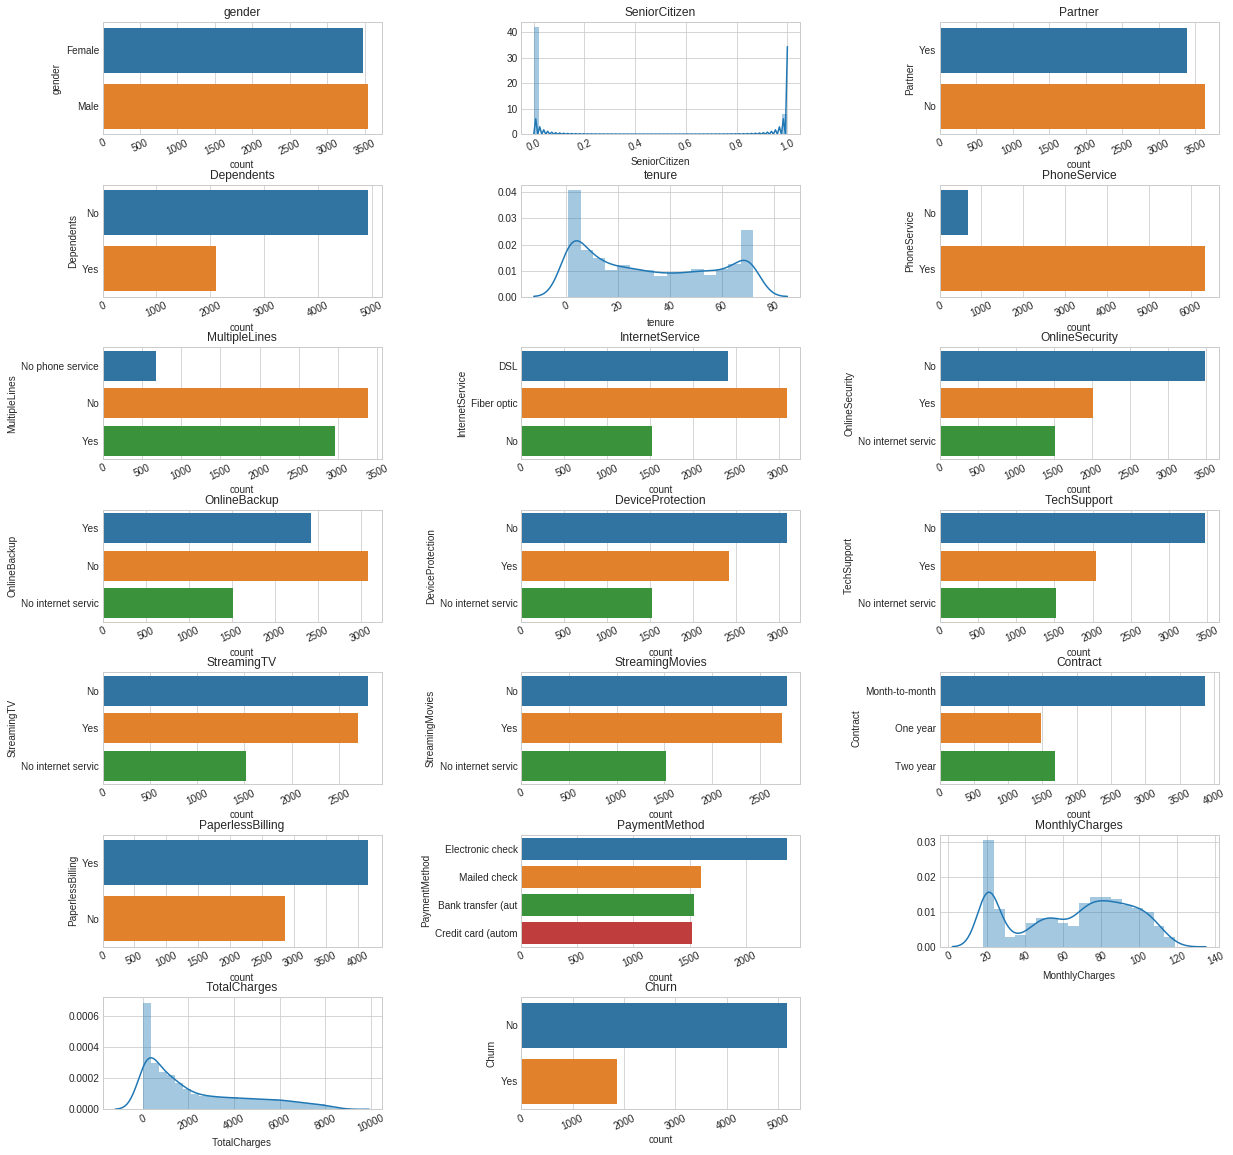

In [12]:
# Let’s plot the distribution of each feature, quick EDA
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    
plot_distribution(telco_customer_churn, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

# Exploratory Data Analisys, Feature Cleaning, Engineering, and Imputation

**Cleaning:**
To clean our data, we'll need to work with:

- **Missing values:** Either omit elements from a dataset that contain missing values or impute them (fill them in).
- **Special values:** Numeric variables are endowed with several formalized special values including ±Inf, NA and NaN. Calculations involving special values often result in special values, and need to be handled/cleaned.
- **Outliers:** They should be detected, but not necessarily removed. Their inclusion in the analysis is a statistical decision.
- **Obvious inconsistencies:** A person's age cannot be negative, a man cannot be pregnant and an under-aged person cannot possess a drivers license. Find the inconsistencies and plan for them.

**Engineering:**
There are multiple techniques for feature engineering:
- **Decompose:** Converting 2014-09-20T20:45:40Z into categorical attributes like hour_of_the_day, part_of_day, etc.
- **Discretization:** We can choose to either discretize some of the continuous variables we have, as some algorithms will perform faster. We are going to do both, and compare the results of the ML algorithms on both discretized and non discretised datasets. We'll call these datasets:

- dataset_bin => where Continuous variables are Discretised
- dataset_con => where Continuous variables are Continuous 

- **Reframe Numerical Quantities:** Changing from grams to kg, and losing detail might be both wanted and efficient for calculation
- **Feature Crossing:** Creating new features as a combination of existing features. Could be multiplying numerical features, or combining categorical variables. This is a great way to add domain expertise knowledge to the dataset.
    
**Imputation:**
We can impute missing values in a number of different ways:
- **Hot-Deck:**	The technique then finds the first missing value and uses the cell value immediately prior to the data that are missing to impute the missing value.
- **Cold-Deck:** Selects donors from another dataset to complete missing data.
- **Mean-substitution:** Another imputation technique involves replacing any missing value with the mean of that variable for all other cases, which has the benefit of not changing the sample mean for that variable.
- **Regression:** A regression model is estimated to predict observed values of a variable based on other variables, and that model is then used to impute values in cases where that variable is missing.

In [13]:
# To perform our data analysis, let's create new dataframes.
dataset_bin = pd.DataFrame() # To contain our dataframe with our discretised continuous variables 
dataset_con = pd.DataFrame() # To contain our dataframe with our continuous variables 

### Feature: "Churn"

This is the feature we are trying to predict. We'll change the string to a binary 0/1. With 1 signifying "Yes", 0 signifying "No".

In [14]:
# Changing the Churn feature to int number (0,1)
telco_customer_churn.loc[telco_customer_churn['Churn'] == 'No', 'Churn'] = 0
telco_customer_churn.loc[telco_customer_churn['Churn'] == 'Yes', 'Churn'] = 1

dataset_bin['Churn'] = telco_customer_churn['Churn']
dataset_con['Churn'] = telco_customer_churn['Churn']

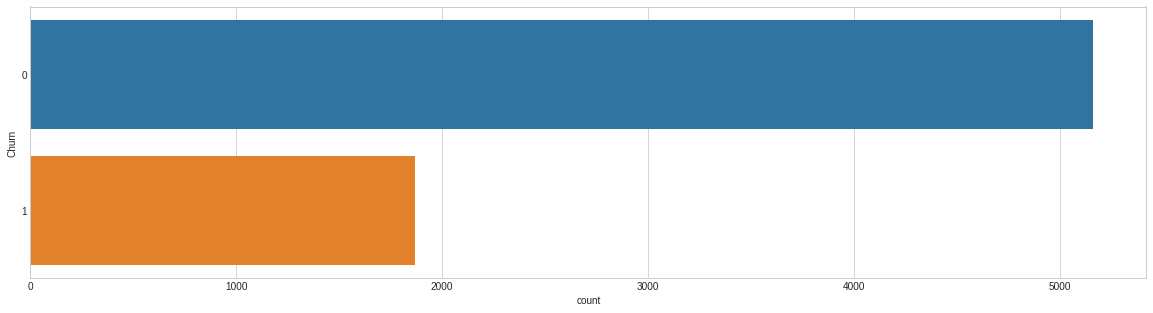

In [16]:
#Count of Churn samples 
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
sns.countplot(y="Churn", data=dataset_bin);

### Feature: MonthlyCharges

We will use the Pandas Cut function to bin the data in equally sized buckets. We will also add our original feature to the dataset_con dataframe.

In [17]:
dataset_bin['MonthlyCharges'] = pd.cut(telco_customer_churn['MonthlyCharges'], 10) # discretised 
dataset_con['MonthlyCharges'] = telco_customer_churn['MonthlyCharges'] # non-discretised

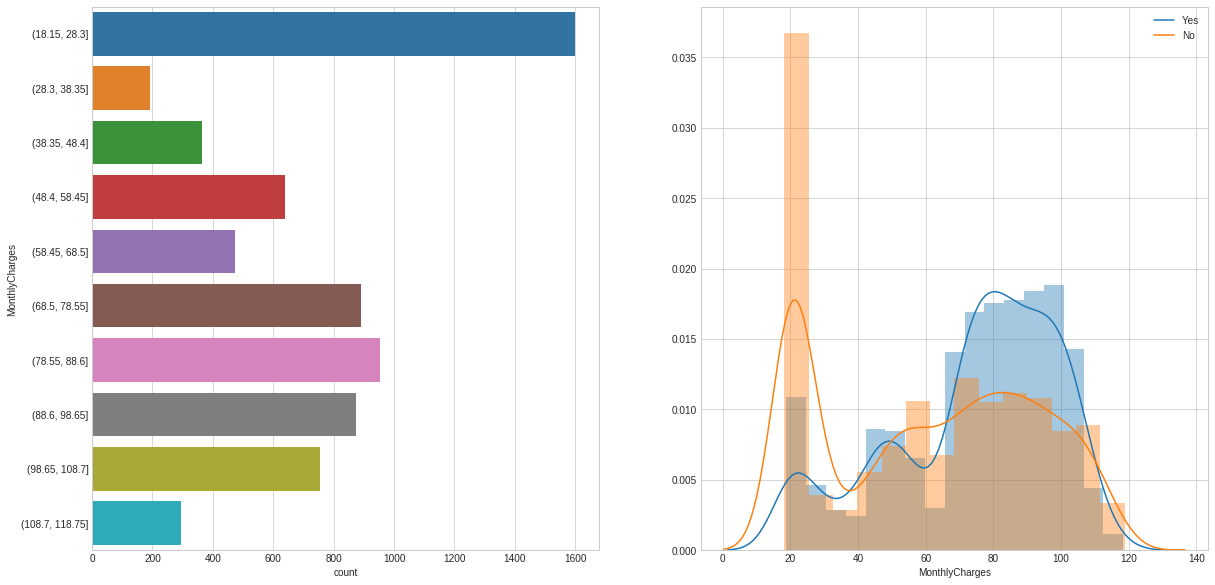

In [18]:
# Distribution of Monthly Charges (Continuos and Discret Bins)
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,10)) 
plt.subplot(1, 2, 1)
sns.countplot(y="MonthlyCharges", data=dataset_bin);
plt.subplot(1, 2, 2)
sns.distplot(dataset_con.loc[dataset_con['Churn'] == 1]['MonthlyCharges'], kde_kws={"label": "Yes"});
sns.distplot(dataset_con.loc[dataset_con['Churn'] == 0]['MonthlyCharges'], kde_kws={"label": "No"});

### Feature: "PaymentMethod"

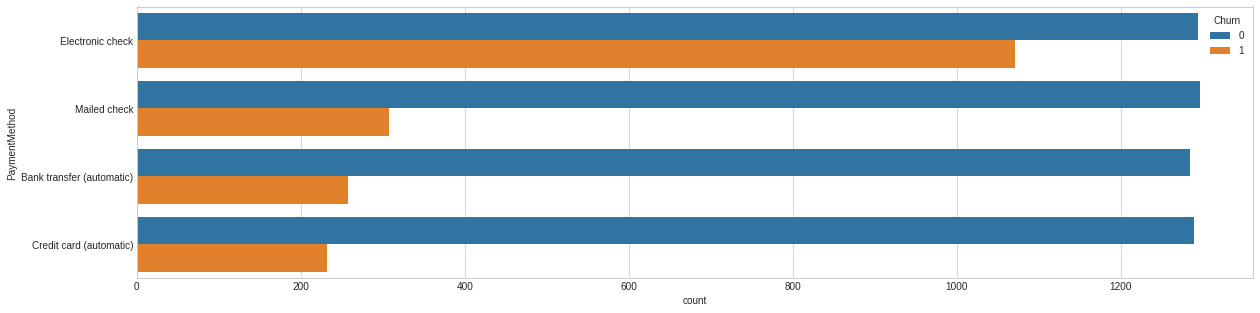

In [19]:
dataset_bin['PaymentMethod'] = telco_customer_churn['PaymentMethod'] 

# Churn and Payment Method
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,5)) 
sns.countplot(y="PaymentMethod", hue='Churn', data=dataset_bin);

### Feature: "Tenure" :Number of months the customer has stayed with the company

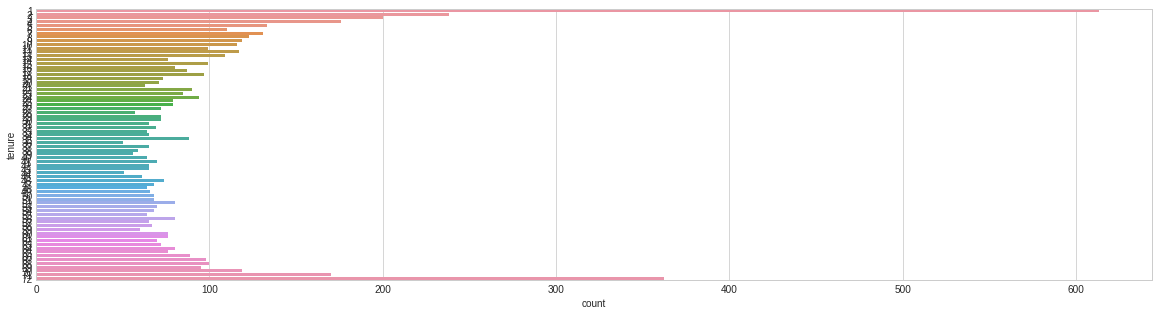

In [21]:
# Tenure distribution
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,5)) 
sns.countplot(y="tenure", data=telco_customer_churn);

In [22]:
# Create Discrete buckets for Tenure
telco_customer_churn['tenure'] = pd.cut(telco_customer_churn['tenure'],12) # discretised 

dataset_bin['tenure'] = telco_customer_churn['tenure']

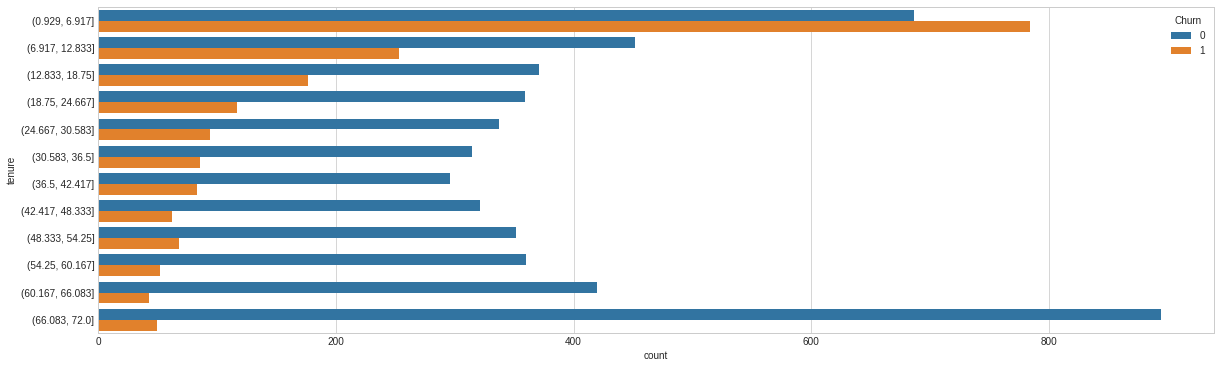

In [23]:
# Churn and tenure
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,6))
sns.countplot(y="tenure", hue='Churn', data=dataset_bin);

### Feature: "Contract" : The contract term of the customer (Month-to-month, One year, Two year)

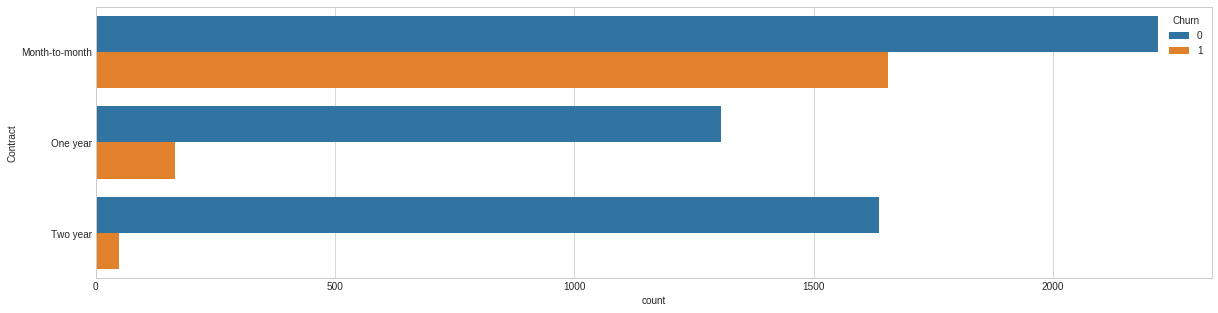

In [24]:
# Churn and Contract Type
dataset_bin['Contract'] = telco_customer_churn['Contract']

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,5)) 
sns.countplot(y="Contract", hue='Churn', data=dataset_bin);

### Feature: "PaperlessBilling": Whether the customer has paperless billing or not (Yes, No)

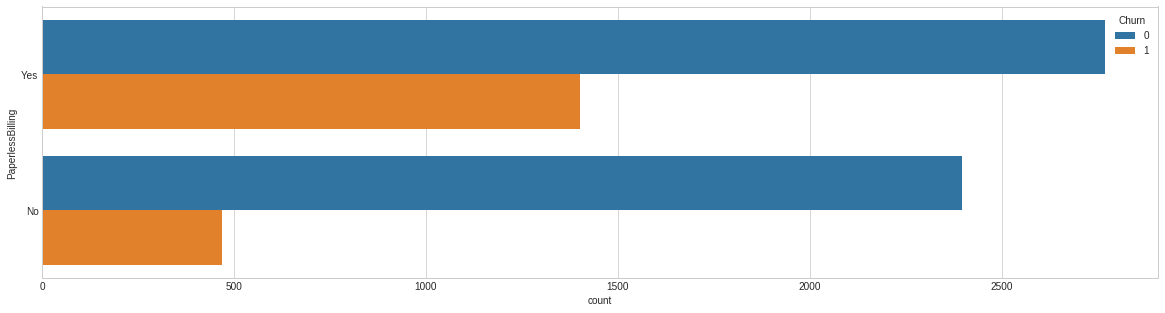

In [25]:
# Churn and PaperlessBilling
dataset_bin['PaperlessBilling'] = telco_customer_churn['PaperlessBilling']

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,5)) 
sns.countplot(y="PaperlessBilling", hue='Churn', data=dataset_bin);

### Feature: "TotalCharges":The total amount charged to the customer

In [26]:
# Create buckets for TotalCharge
dataset_bin['TotalCharges'] = pd.cut(telco_customer_churn['TotalCharges'], 10) # discretised 
dataset_con['TotalCharges'] = telco_customer_churn['TotalCharges'] # non-discretised

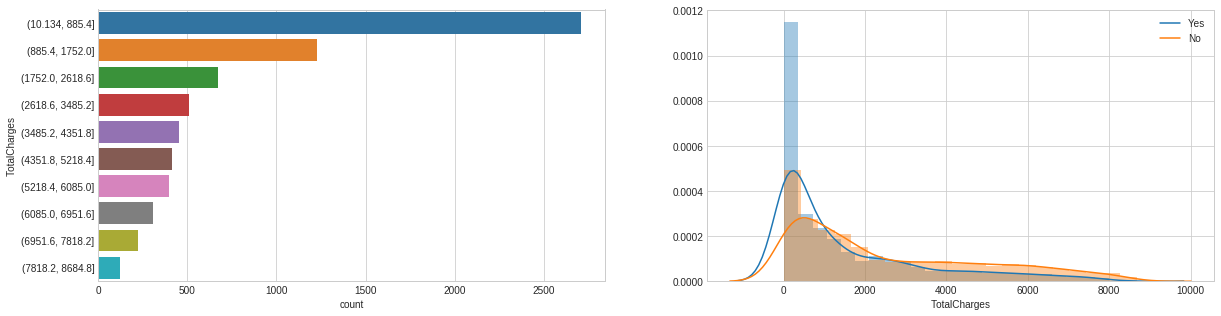

In [27]:
# Distribution of Total Charges (Continuos and Discret Bins)
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="TotalCharges", data=dataset_bin);
plt.subplot(1, 2, 2)
sns.distplot(dataset_con.loc[dataset_con['Churn'] == 1]['TotalCharges'], kde_kws={"label": "Yes"});
sns.distplot(dataset_con.loc[dataset_con['Churn'] == 0]['TotalCharges'], kde_kws={"label": "No"});

### Feature: "Dependents": Whether the customer has dependents or not (Yes, No)

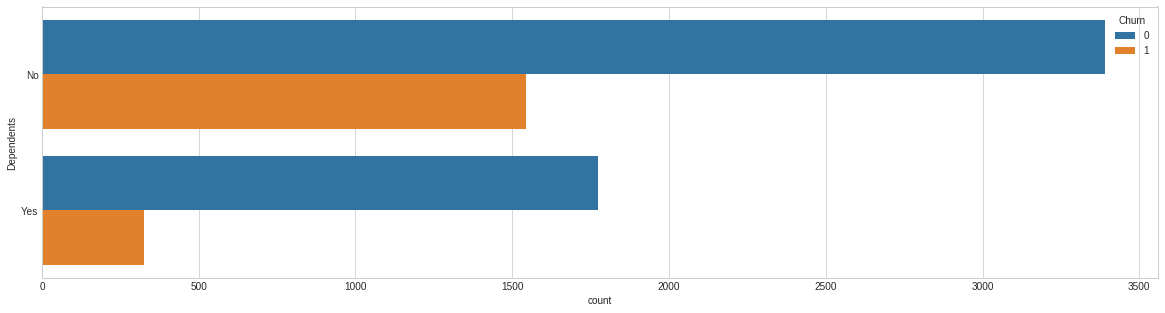

In [28]:
# Churn and Dependents
dataset_bin['Dependents'] = telco_customer_churn['Dependents']

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,5)) 
sns.countplot(y="Dependents", hue='Churn', data=dataset_bin);

### Feature: "SeniorCitizen": Whether the customer is a senior citizen or not (1, 0)

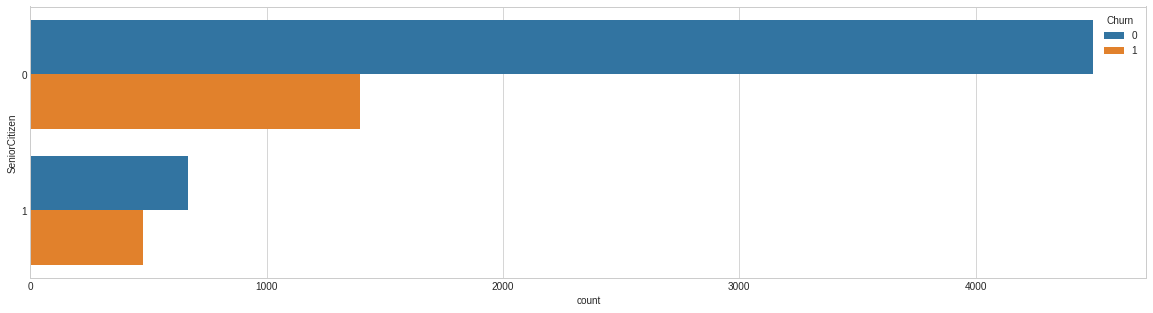

In [29]:
# Churn and SeniorCitizen
dataset_bin['SeniorCitizen'] = telco_customer_churn['SeniorCitizen']

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
sns.countplot(y="SeniorCitizen", hue='Churn', data=dataset_bin);

### Feature: "Gender": Customer gender (female, male)

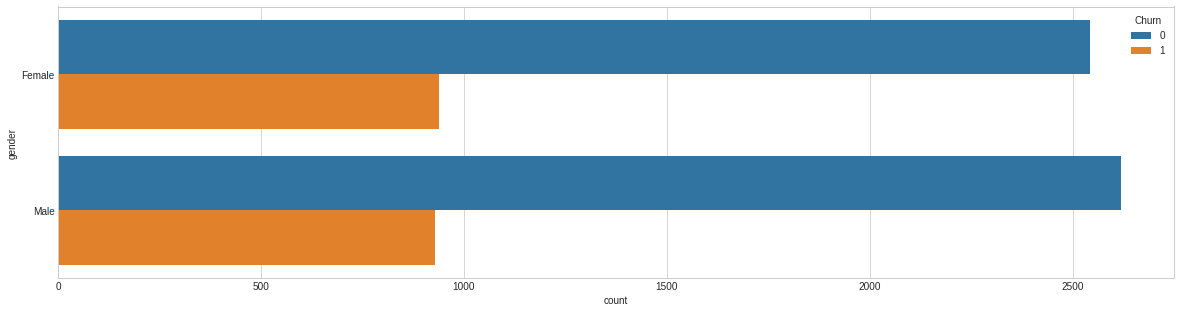

In [30]:
# Churn and Gender
dataset_bin['gender'] = telco_customer_churn['gender']

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
sns.countplot(y="gender", hue='Churn', data=dataset_bin);

### Feature: "Partner": Whether the customer has a partner or not (Yes, No)

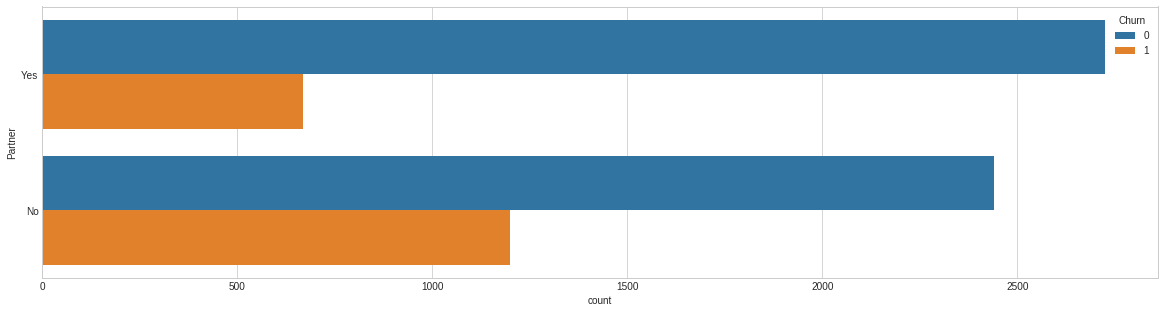

In [31]:
# Churn and Partner
dataset_bin['Partner'] = telco_customer_churn['Partner']

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
sns.countplot(y="Partner", hue='Churn', data=dataset_bin);

### Feature: "PhoneService": Whether the customer has a phone service or not (Yes, No)

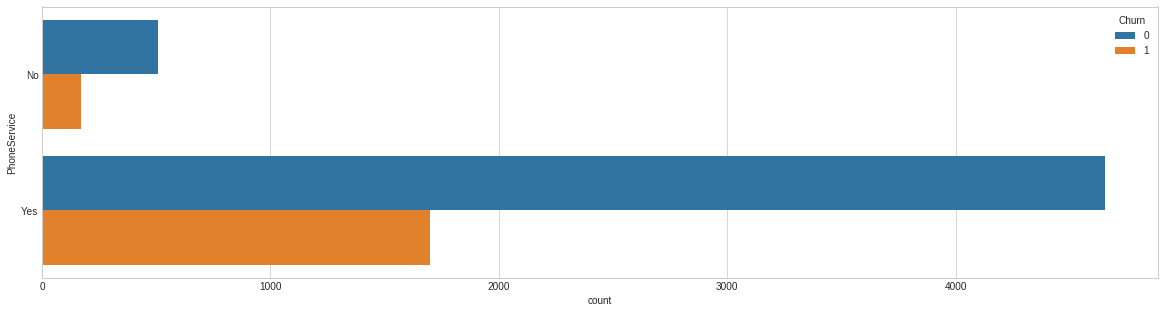

In [32]:
# Churn and Phone Service
dataset_bin['PhoneService'] = telco_customer_churn['PhoneService']

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
sns.countplot(y="PhoneService", hue='Churn', data=dataset_bin);

### Feature: "InternetService": Customer’s internet service provider (DSL, Fiber optic, No)

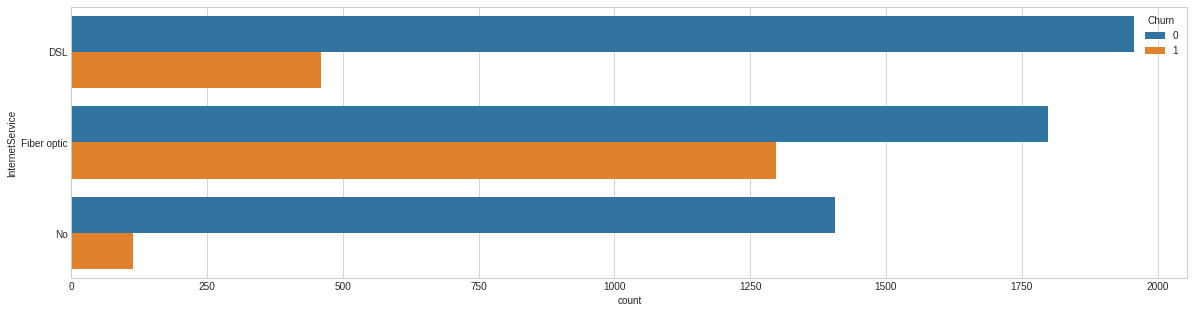

In [33]:
# CChurn and Internet Service
dataset_bin['InternetService'] = telco_customer_churn['InternetService']

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
sns.countplot(y="InternetService", hue='Churn',data=dataset_bin);

### Feature: "StreamingTV": Whether the customer has streaming TV or not (Yes, No, No internet service)

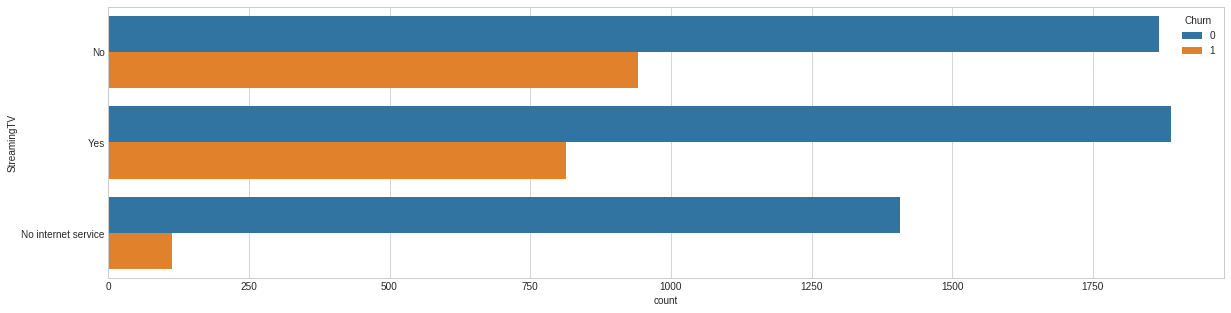

In [34]:
# Churn and Streaming TV Service
dataset_bin['StreamingTV'] = telco_customer_churn['StreamingTV']

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
sns.countplot(y="StreamingTV", hue='Churn', data=dataset_bin);

### Feature: "StreamingMovies": Whether the customer has streaming movies or not (Yes, No, No internet service)

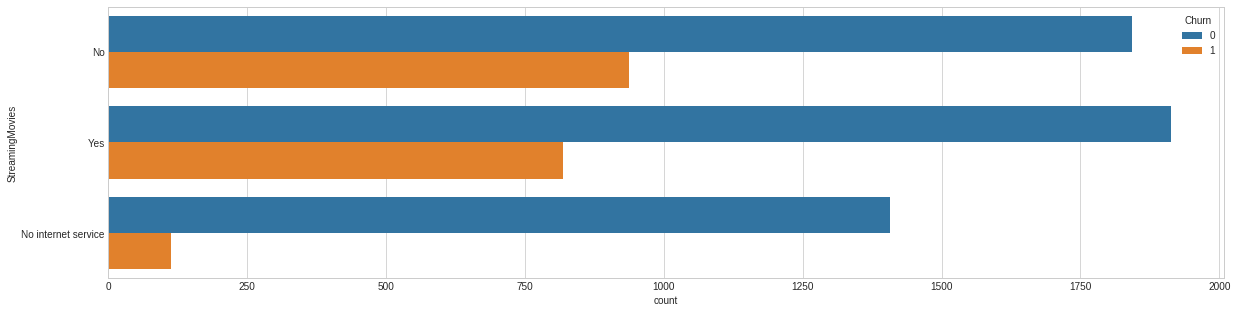

In [35]:
# Churn and Streaming Movies Service
dataset_bin['StreamingMovies'] = telco_customer_churn['StreamingMovies']

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
sns.countplot(y="StreamingMovies", hue='Churn', data=dataset_bin);

### Features: "TechSupport": Whether the customer has tech support or not (Yes, No, No internet service)

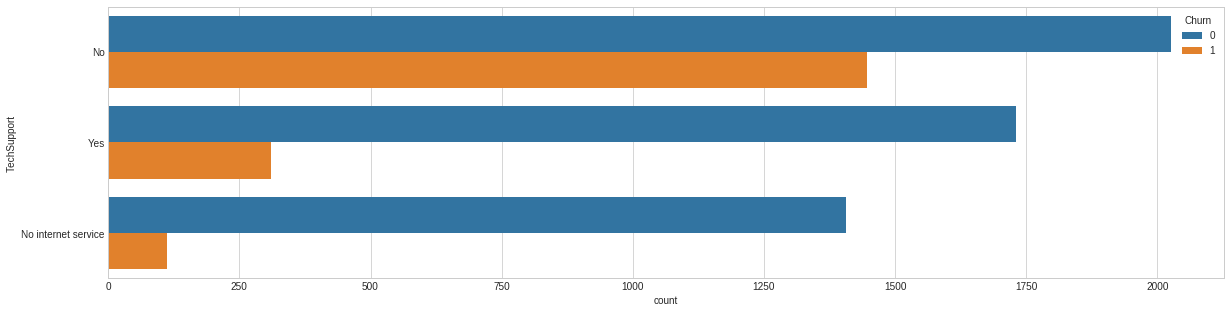

In [36]:
# Churn and TechSupport Service
dataset_bin['TechSupport'] = telco_customer_churn['TechSupport']

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
sns.countplot(y="TechSupport", hue='Churn', data=dataset_bin);

### Features Heatmap by correlation

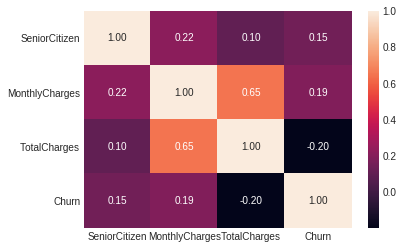

In [37]:
sns.heatmap(telco_customer_churn.corr(), annot=True, fmt=".2f")
plt.show()

## Bi-variate Analysis

So far, we have analised all features individually. Let's now start combining some of these features together to obtain further insight into the interactions between them.

In [38]:
dataset_bin.head()

,Churn,MonthlyCharges,PaymentMethod,tenure,Contract,PaperlessBilling,TotalCharges,Dependents,SeniorCitizen,gender,Partner,PhoneService,InternetService,StreamingTV,StreamingMovies,TechSupport
0,0,"(28.3, 38.35]",Electronic check,"(0.929, 6.917]",Month-to-month,Yes,"(10.134, 885.4]",No,0,Female,Yes,No,DSL,No,No,No
1,0,"(48.4, 58.45]",Mailed check,"(30.583, 36.5]",One year,No,"(1752.0, 2618.6]",No,0,Male,No,Yes,DSL,No,No,No
2,1,"(48.4, 58.45]",Mailed check,"(0.929, 6.917]",Month-to-month,Yes,"(10.134, 885.4]",No,0,Male,No,Yes,DSL,No,No,No
3,0,"(38.35, 48.4]",Bank transfer (automatic),"(42.417, 48.333]",One year,No,"(1752.0, 2618.6]",No,0,Male,No,No,DSL,No,No,Yes
4,1,"(68.5, 78.55]",Electronic check,"(0.929, 6.917]",Month-to-month,Yes,"(10.134, 885.4]",No,0,Female,No,Yes,Fiber optic,No,No,No


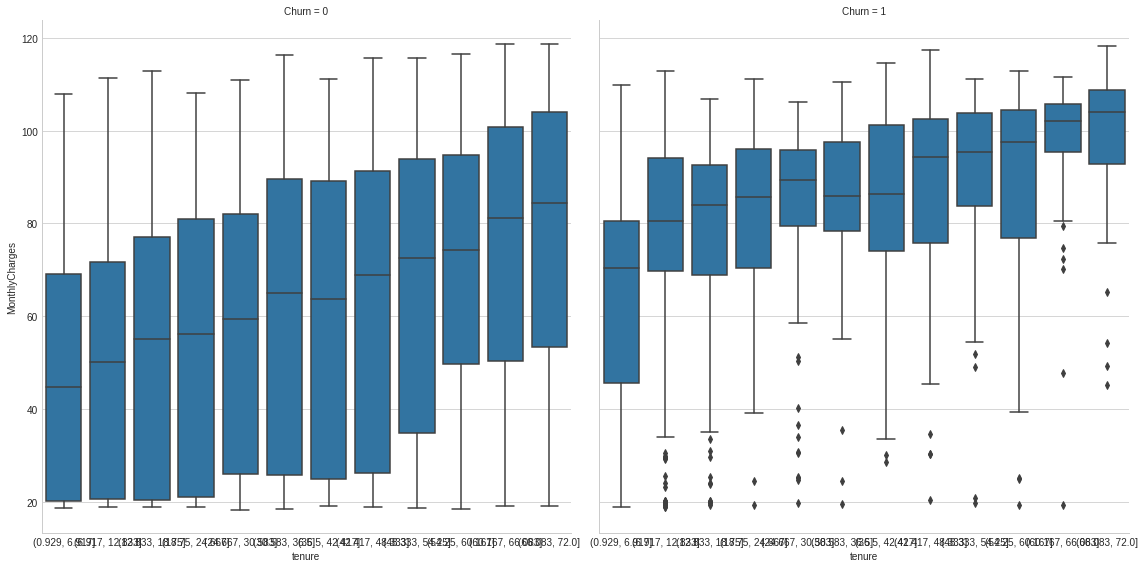

In [40]:
# Effect of tenure and MonthlyCharges on Churn. We have to use the original Dataset to plot this chart
plt.style.use('seaborn-whitegrid')
g = sns.FacetGrid(telco_customer_churn, col='Churn', size=8, aspect=1)
g = g.map(sns.boxplot, 'tenure', 'MonthlyCharges')

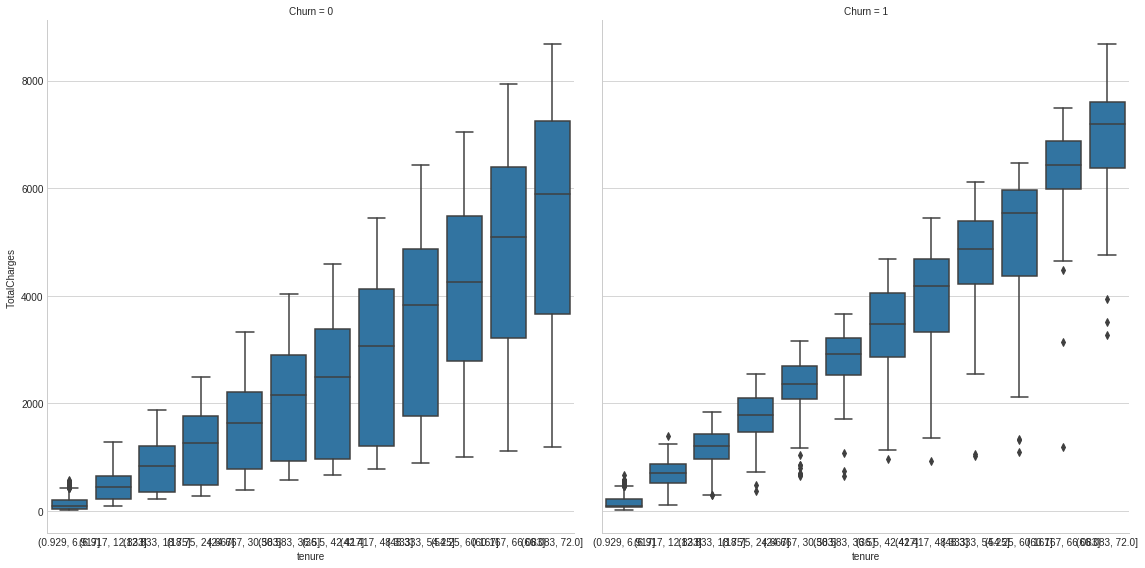

In [41]:
# Effect of tenure and TotalCharges on Churn. We have to use the original Dataset to plot this chart
plt.style.use('seaborn-whitegrid')
g = sns.FacetGrid(telco_customer_churn, col='Churn', size=8, aspect=1)
g = g.map(sns.boxplot, 'tenure', 'TotalCharges')

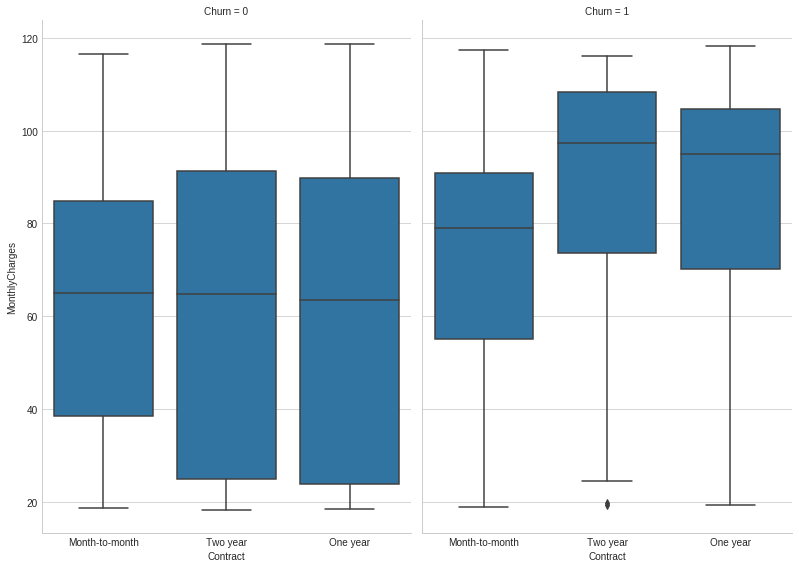

In [42]:
# Effect of Contract type and MonthlyCharges on Churn. We have to use the original Dataset to plot this chart
plt.style.use('seaborn-whitegrid')
g = sns.FacetGrid(telco_customer_churn, col='Churn', size=8, aspect=.7)
g = g.map(sns.boxplot, 'Contract', 'MonthlyCharges')

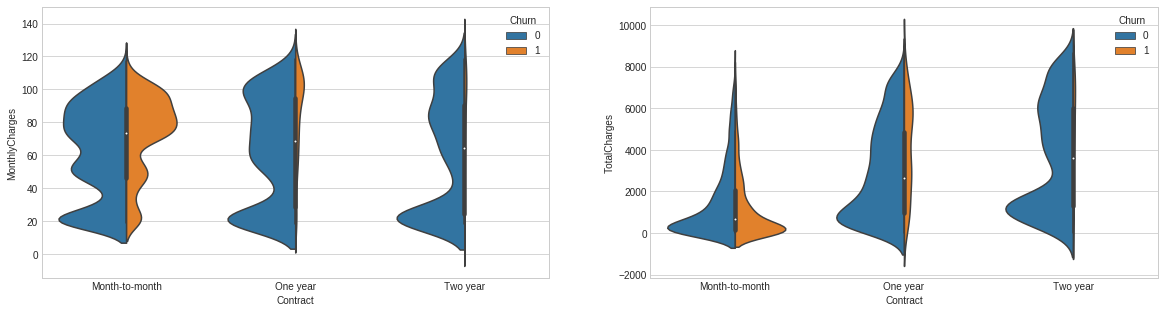

In [43]:
# Relationships of Contract Lenght, Monhtly Charges, TotalCharges on Churn. We have to use the original Dataset to plot this chart
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.violinplot(x='Contract', y='MonthlyCharges', hue='Churn', data=telco_customer_churn, split=True, scale='count');

plt.subplot(1, 2, 2)
sns.violinplot(x='Contract', y='TotalCharges', hue='Churn', data=telco_customer_churn, split=True, scale='count');


### Visualizing pairwise relationships

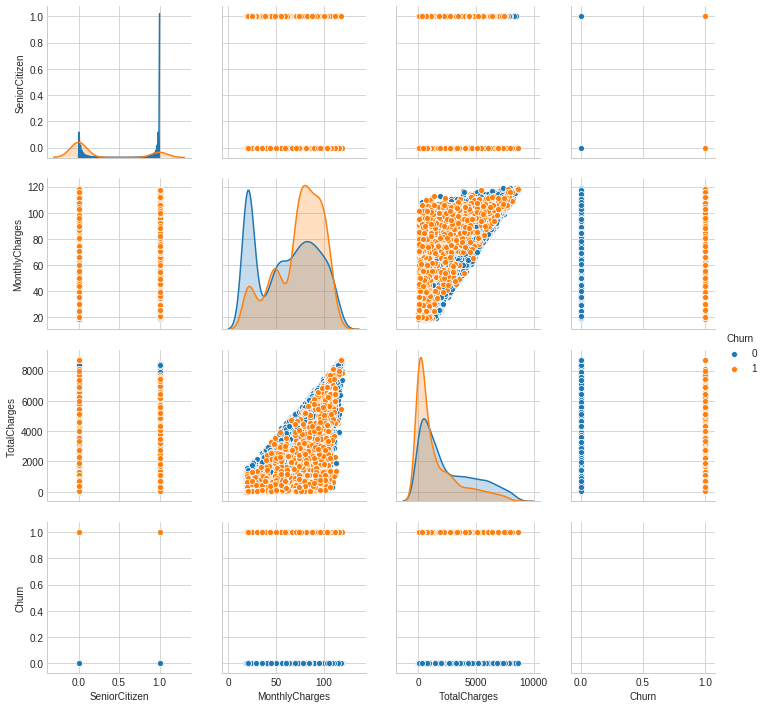

In [44]:
sns.pairplot(telco_customer_churn, hue='Churn');

## Feature Encoding

Remember that Machine Learning algorithms perform Linear Algebra on Matrices, which means all features need have numeric values. The process of converting Categorical Features into values is called Encoding. Let's perform both One-Hot and Label encoding.

Additional Resources: http://pbpython.com/categorical-encoding.html

In [45]:
# One Hot Encodes all labels before Machine Learning
one_hot_cols = dataset_bin.columns.tolist()
one_hot_cols.remove('Churn')
dataset_bin_enc = pd.get_dummies(dataset_bin, columns=one_hot_cols)

dataset_bin_enc.head()

,Churn,"MonthlyCharges_(18.15, 28.3]","MonthlyCharges_(28.3, 38.35]","MonthlyCharges_(38.35, 48.4]","MonthlyCharges_(48.4, 58.45]","MonthlyCharges_(58.45, 68.5]","MonthlyCharges_(68.5, 78.55]","MonthlyCharges_(78.55, 88.6]","MonthlyCharges_(88.6, 98.65]","MonthlyCharges_(98.65, 108.7]",...,InternetService_No,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes
0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0


## Feature Reduction / Selection

Once we have our features ready to use, we might find that the number of features available is too large to be run in a reasonable timeframe by our machine learning algorithms. There's a number of options available to us for feature reduction and feature selection.

- **Dimensionality Reduction:**
    - **Principal Component Analysis (PCA):** Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components.
    - **Singular Value Decomposition (SVD):** SVD is a factorization of a real or complex matrix. It is the generalization of the eigendecomposition of a positive semidefinite normal matrix (for example, a symmetric matrix with positive eigenvalues) to any m×n  matrix via an extension of the polar decomposition. It has many useful applications in signal processing and statistics.


- **Feature Importance/Relevance:**
    - **Filter Methods:** Filter type methods select features based only on general metrics like the correlation with the variable to predict. Filter methods suppress the least interesting variables. The other variables will be part of a classification or a regression model used to classify or to predict data. These methods are particularly effective in computation time and robust to overfitting.
    - **Wrapper Methods:** Wrapper methods evaluate subsets of variables which allows, unlike filter approaches, to detect the possible interactions between variables. The two main disadvantages of these methods are : The increasing overfitting risk when the number of observations is insufficient. AND. The significant computation time when the number of variables is large.
    - **Embedded Methods:** Embedded methods try to combine the advantages of both previous methods. A learning algorithm takes advantage of its own variable selection process and performs feature selection and classification simultaneously.

### Feature Correlation

Correlation ia s measure of how much two random variables change together. Features should be uncorrelated with each other and highly correlated to the feature we’re trying to predict.

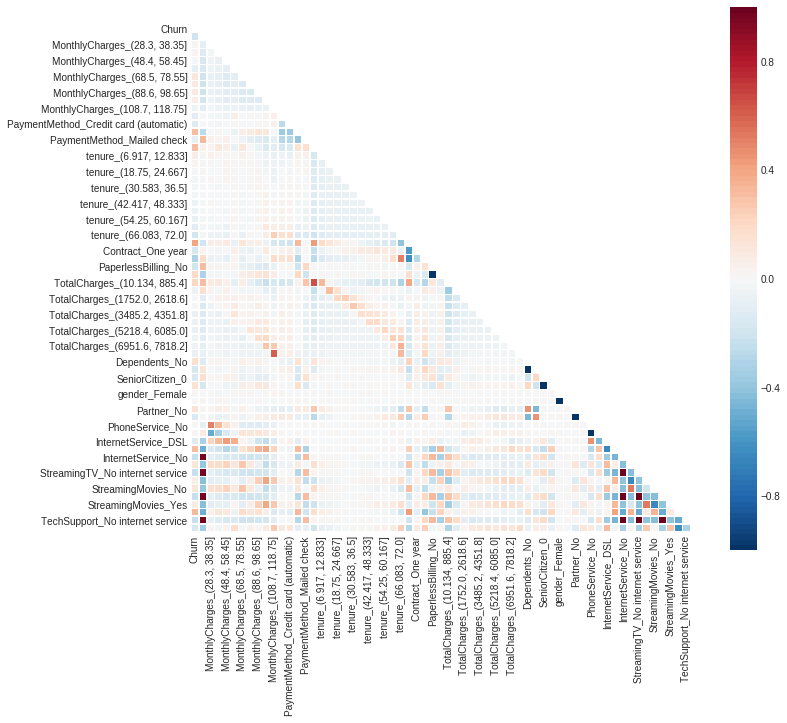

In [46]:
# Create a correlation plot of both datasets.
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(25,10)) 

plt.subplot(1, 2, 1)
# Generate a mask for the upper triangle
mask = np.zeros_like(dataset_bin_enc.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(dataset_bin_enc.corr(), 
            vmin=-1, vmax=1, 
            square=True, 
            cmap=sns.color_palette("RdBu_r", 100), 
            mask=mask, 
            linewidths=.5);



### Feature Importance

Random forest consists of a number of decision trees. Every node in the decision trees is a condition on a single feature, designed to split the dataset into two so that similar response values end up in the same set. The measure based on which the (locally) optimal condition is chosen is called impurity. When training a tree, it can be computed how much each feature decreases the weighted impurity in a tree. For a forest, the impurity decrease from each feature can be averaged and the features are ranked according to this measure. This is the feature importance measure exposed in sklearn’s Random Forest implementations.

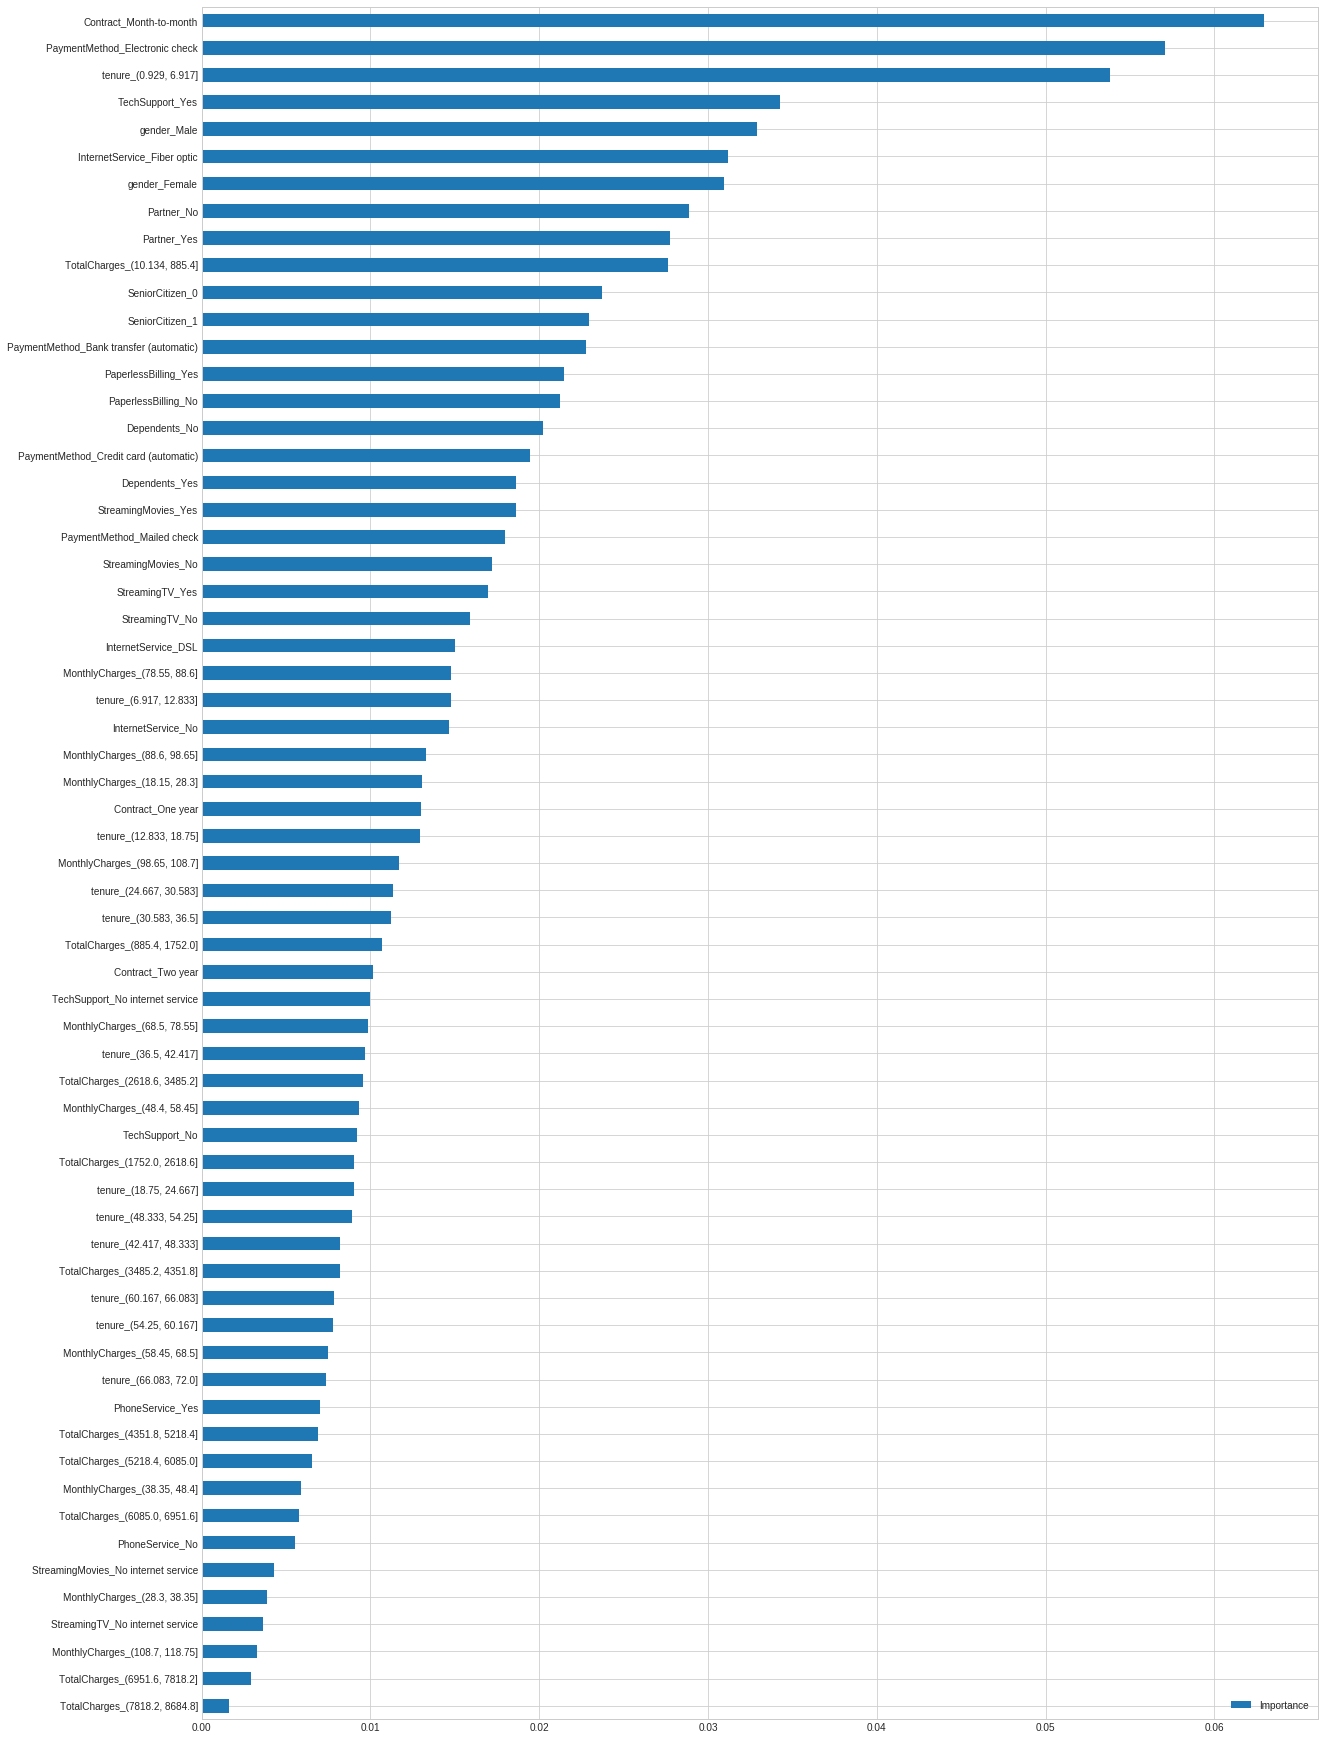

In [47]:
# Using Random Forest to gain an insight on Feature Importance
clf = RandomForestClassifier()
clf.fit(dataset_bin_enc.drop('Churn', axis=1), dataset_bin_enc['Churn'])

plt.style.use('seaborn-whitegrid')
importance = clf.feature_importances_
importance = pd.DataFrame(importance, index=dataset_bin_enc.drop('Churn', axis=1).columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(importance)/2));

### PCA

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components.

We can use PCA to reduce the number of features to use in our ML algorithms, and graphing the variance gives us an idea of how many features we really need to represent our dataset fully.

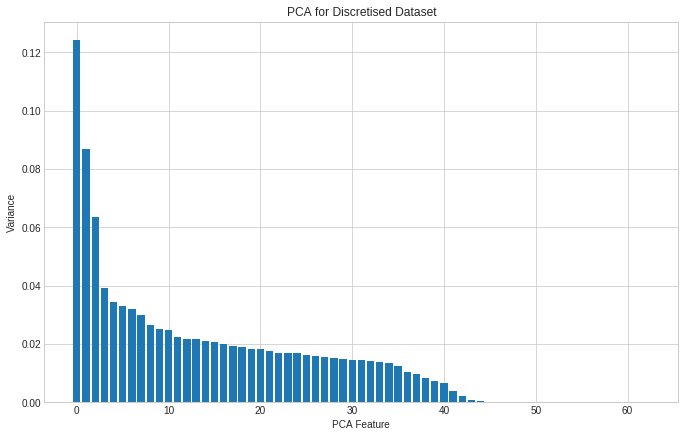

In [48]:
# Calculating PCA for both datasets, and graphing the Variance for each feature, per dataset
std_scale = preprocessing.StandardScaler().fit(dataset_bin_enc.drop('Churn', axis=1))
X = std_scale.transform(dataset_bin_enc.drop('Churn', axis=1))
pca1 = PCA(n_components=len(dataset_bin_enc.columns)-1)
fit1 = pca1.fit(X)

# Graphing the variance per feature
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(25,7)) 

plt.subplot(1, 2, 1)
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.title('PCA for Discretised Dataset')
plt.bar(range(0, fit1.explained_variance_ratio_.size), fit1.explained_variance_ratio_);

### Recursive Feature Elimination

Feature ranking with recursive feature elimination and cross-validated selection of the best number of features.

Feature Ranking For Discretised: [ 2  1  3 12  1  1  1  1  1  1 21 19  1 20  1  1  1 29 23 22  1 25 26  1
  1  1  1 13  1  1 30 31 16 15 18  1  1 28 14 17  1 11 10  1 27  1  1  5
  4  7  6  1  1  1  1  1  9  1  1  8  1  1 24]
Optimal number of features : 33


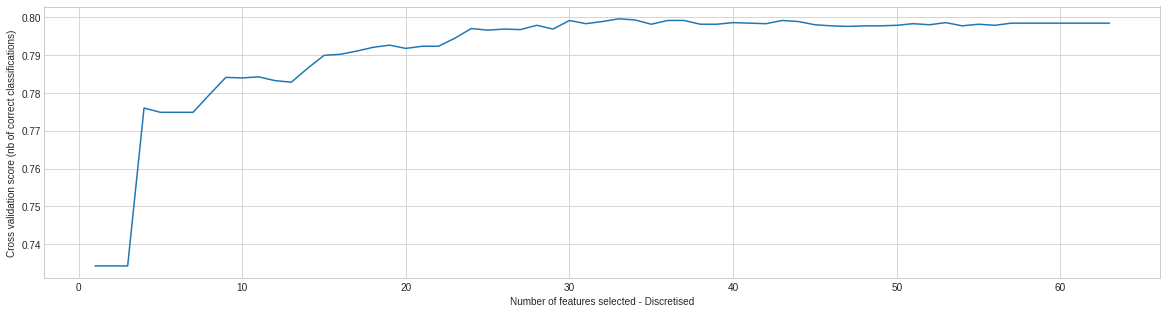

In [50]:
# Calculating RFE for non-discretised dataset, and graphing the Importance for each feature, per dataset
selector1 = RFECV(LogisticRegression(), step=1, cv=5, n_jobs=-1)
selector1 = selector1.fit(dataset_bin_enc.drop('Churn', axis=1).values, dataset_bin_enc['Churn'].values)
print("Feature Ranking For Discretised: %s" % selector1.ranking_)
print("Optimal number of features : %d" % selector1.n_features_)
# Plot number of features VS. cross-validation scores
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,5)) 
plt.xlabel("Number of features selected - Discretised")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(selector1.grid_scores_) + 1), selector1.grid_scores_);

# Feature space could be subsetted like so:
dataset_bin_enc = dataset_bin_enc[dataset_bin_enc.columns[np.insert(selector1.support_, 0, True)]]

## Final Dataset to use

We have decided to use the dataset with feature reduction or selection algorithms to apply our ML algorithms. 

In [51]:
# Dataset selected is the discret dataset since mostly of the original dataset features are categorical and
# and we reduced all of the 3 numeric features to bins (Tenure, MonthlyCharges,TotalCharges)


#from teh previoud Exploratory Data Analisys (EDA) of the data we found high correlation between: MonthlyCharges, 
# Contract(MonthbyMonth) and tenure

selected_dataset = dataset_bin_enc

In [52]:
selected_dataset.head(2)

,Churn,"MonthlyCharges_(28.3, 38.35]","MonthlyCharges_(58.45, 68.5]","MonthlyCharges_(68.5, 78.55]","MonthlyCharges_(78.55, 88.6]","MonthlyCharges_(88.6, 98.65]","MonthlyCharges_(98.65, 108.7]","MonthlyCharges_(108.7, 118.75]",PaymentMethod_Electronic check,"tenure_(0.929, 6.917]",...,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,StreamingTV_No,StreamingTV_No internet service,StreamingMovies_No,StreamingMovies_No internet service,TechSupport_No,TechSupport_No internet service
0,0,1,0,0,0,0,0,0,1,1,...,0,1,0,0,1,0,1,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,1,0,1,0


## Splitting Data into Training and Testing Datasets

We need to split the data back into the training and testing datasets. Remember we joined both right at the beginning.

In [53]:
# Splitting the Training and Test data sets (70% Train + 30% Test)
train = selected_dataset.loc[0:4900,:]
test = selected_dataset.loc[4900:,:]

### Rename datasets before Machine Learning algos

In [54]:
X_train_w_label = train
X_train = train.drop(['Churn'], axis=1)
y_train = train['Churn'].astype('int64')
X_test  = test.drop(['Churn'], axis=1)
y_test  = test['Churn'].astype('int64')

## Machine Learning Algorithms

### Data Review

Let's take one last peek at our data before we start running the Machine Learning algorithms.

In [55]:
X_train.shape

(4893, 33)

In [56]:
X_train.head()

,"MonthlyCharges_(28.3, 38.35]","MonthlyCharges_(58.45, 68.5]","MonthlyCharges_(68.5, 78.55]","MonthlyCharges_(78.55, 88.6]","MonthlyCharges_(88.6, 98.65]","MonthlyCharges_(98.65, 108.7]","MonthlyCharges_(108.7, 118.75]",PaymentMethod_Electronic check,"tenure_(0.929, 6.917]","tenure_(6.917, 12.833]",...,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,StreamingTV_No,StreamingTV_No internet service,StreamingMovies_No,StreamingMovies_No internet service,TechSupport_No,TechSupport_No internet service
0,1,0,0,0,0,0,0,1,1,0,...,0,1,0,0,1,0,1,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,1,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,1,1,0,0,1,0,1,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,1,0,0,0
4,0,0,1,0,0,0,0,1,1,0,...,0,0,1,0,1,0,1,0,1,0


In [57]:
y_train.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [58]:
# Setting a random seed will guarantee we get the same results 
# every time we run our training and testing.
random.seed(1)

### Algorithms

From here, we will be running the following algorithms.

- KNN
- Logistic Regression
- Random Forest
- Naive Bayes
- Stochastic Gradient Decent
- Linear SVC
- Decision Tree
- Gradient Boosted Trees

Because there's a great deal of repetitiveness on the code for each, we'll create a custom function to analyse this.

For some algorithms, we have also chosen to run a Random Hyperparameter search, to select the best hyperparameters for a given algorithm.

In [59]:
# calculate the fpr and tpr for all thresholds of the classification
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [60]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, X_test, cv):
    # One Pass
    model = algo.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    if (isinstance(algo, (LogisticRegression, 
                          KNeighborsClassifier, 
                          GaussianNB, 
                          DecisionTreeClassifier, 
                          RandomForestClassifier,
                          GradientBoostingClassifier))):
        probs = model.predict_proba(X_test)[:,1]
    else:
        probs = "Not Available"
    acc = round(model.score(X_test, y_test) * 100, 2) 
    # CV 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    return train_pred, test_pred, acc, acc_cv, probs

In [61]:
# Logistic Regression - Random Search for Hyperparameters

# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
# Specify parameters and distributions to sample from
param_dist = {'penalty': ['l2', 'l1'], 
                         'class_weight': [None, 'balanced'],
                         'C': np.logspace(-20, 20, 10000), 
                         'intercept_scaling': np.logspace(-20, 20, 10000)}

# Run Randomized Search
n_iter_search = 10
lrc = LogisticRegression()
random_search = RandomizedSearchCV(lrc, 
                                   n_jobs=-1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 1.36 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.799 (std: 0.008)
Parameters: {'penalty': 'l1', 'C': 1510838077564.8662, 'class_weight': None, 'intercept_scaling': 7.414587739333267}

Model with rank: 2
Mean validation score: 0.798 (std: 0.007)
Parameters: {'penalty': 'l2', 'C': 62341820.154773876, 'class_weight': None, 'intercept_scaling': 3.0906441547996435}

Model with rank: 3
Mean validation score: 0.746 (std: 0.012)
Parameters: {'penalty': 'l1', 'C': 4.483995483873557e+16, 'class_weight': 'balanced', 'intercept_scaling': 0.0005415934050562087}

Model with rank: 4
Mean validation score: 0.738 (std: 0.000)
Parameters: {'penalty': 'l1', 'C': 5.397258479626578e-19, 'class_weight': None, 'intercept_scaling': 34.8461029535951}

Model with rank: 4
Mean validation score: 0.738 (std: 0.000)
Parameters: {'penalty': 'l1', 'C': 1.9598788349688227e-18, 'class_weight': 'balanced', 'intercept_scaling': 62384903545.60317}

Mode

In [62]:
# Logistic Regression
start_time = time.time()
train_pred_log, test_pred_log, acc_log, acc_cv_log, probs_log = fit_ml_algo(LogisticRegression(n_jobs = -1), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 79.44
Accuracy CV 10-Fold: 80.26
Running Time: 0:00:00.410474


In [63]:
print (metrics.classification_report(y_train, train_pred_log))

             precision    recall  f1-score   support

          0       0.84      0.91      0.87      3611
          1       0.66      0.51      0.57      1282

avg / total       0.79      0.80      0.79      4893



In [64]:
print (metrics.classification_report(y_test, test_pred_log)) 

             precision    recall  f1-score   support

          0       0.83      0.91      0.86      1552
          1       0.67      0.50      0.57       588

avg / total       0.78      0.79      0.78      2140



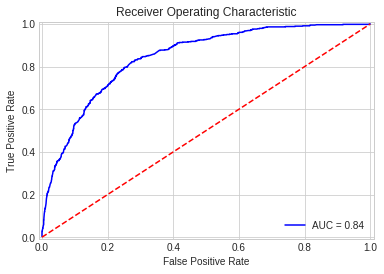

In [65]:
plot_roc_curve(y_test, probs_log)

In [66]:
# k-Nearest Neighbors
start_time = time.time()
train_pred_knn, test_pred_knn, acc_knn, acc_cv_knn, probs_knn = fit_ml_algo(KNeighborsClassifier(n_neighbors = 3,
                                                                                                 n_jobs = -1), 
                                                                                                 X_train, 
                                                                                                 y_train, 
                                                                                                 X_test, 
                                                                                                 10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 75.79
Accuracy CV 10-Fold: 74.35
Running Time: 0:00:01.747308


In [67]:
print (metrics.classification_report(y_train, train_pred_knn)) 

             precision    recall  f1-score   support

          0       0.82      0.83      0.83      3611
          1       0.51      0.49      0.50      1282

avg / total       0.74      0.74      0.74      4893



In [68]:
print (metrics.classification_report(y_test, test_pred_knn)) 

             precision    recall  f1-score   support

          0       0.82      0.85      0.84      1552
          1       0.57      0.51      0.54       588

avg / total       0.75      0.76      0.75      2140



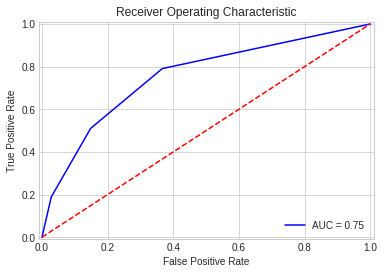

In [69]:
plot_roc_curve(y_test, probs_knn)

In [70]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, test_pred_gaussian, acc_gaussian, acc_cv_gaussian, probs_gau = fit_ml_algo(GaussianNB(), 
                                                                                     X_train, 
                                                                                     y_train, 
                                                                                     X_test, 
                                                                                     10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 68.93
Accuracy CV 10-Fold: 69.63
Running Time: 0:00:00.281864


In [71]:
print (metrics.classification_report(y_train, train_pred_gaussian)) 

             precision    recall  f1-score   support

          0       0.91      0.65      0.76      3611
          1       0.46      0.82      0.59      1282

avg / total       0.79      0.70      0.71      4893



In [72]:
print (metrics.classification_report(y_test, test_pred_gaussian)) 

             precision    recall  f1-score   support

          0       0.90      0.64      0.75      1552
          1       0.46      0.81      0.59       588

avg / total       0.78      0.69      0.71      2140



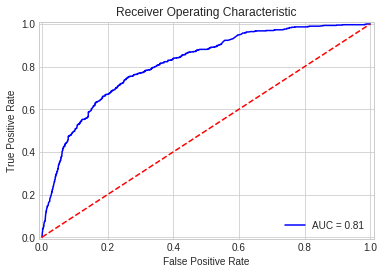

In [73]:
plot_roc_curve(y_test, probs_gau)

In [74]:
# Linear SVC
start_time = time.time()
train_pred_svc, test_pred_svc, acc_linear_svc, acc_cv_linear_svc, _ = fit_ml_algo(LinearSVC(),
                                                                                           X_train, 
                                                                                           y_train,
                                                                                           X_test, 
                                                                                           10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 78.93
Accuracy CV 10-Fold: 80.24
Running Time: 0:00:00.753993


In [75]:
print (metrics.classification_report(y_train, train_pred_svc)) 

             precision    recall  f1-score   support

          0       0.83      0.91      0.87      3611
          1       0.67      0.49      0.56      1282

avg / total       0.79      0.80      0.79      4893



In [76]:
print (metrics.classification_report(y_test, test_pred_svc)) 

             precision    recall  f1-score   support

          0       0.82      0.91      0.86      1552
          1       0.67      0.47      0.55       588

avg / total       0.78      0.79      0.78      2140



In [77]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, test_pred_sgd, acc_sgd, acc_cv_sgd, _ = fit_ml_algo(SGDClassifier(n_jobs = -1), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 76.5
Accuracy CV 10-Fold: 72.25
Running Time: 0:00:00.404615


In [78]:
print (metrics.classification_report(y_train, train_pred_sgd)) 

             precision    recall  f1-score   support

          0       0.85      0.76      0.80      3611
          1       0.48      0.62      0.54      1282

avg / total       0.75      0.72      0.73      4893



In [79]:
print (metrics.classification_report(y_test, test_pred_sgd)) 

             precision    recall  f1-score   support

          0       0.87      0.80      0.83      1552
          1       0.56      0.69      0.62       588

avg / total       0.78      0.76      0.77      2140



In [80]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, test_pred_dt, acc_dt, acc_cv_dt, probs_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 76.12
Accuracy CV 10-Fold: 74.8
Running Time: 0:00:00.279621


In [81]:
print (metrics.classification_report(y_train, train_pred_dt)) 

             precision    recall  f1-score   support

          0       0.81      0.85      0.83      3611
          1       0.52      0.45      0.48      1282

avg / total       0.74      0.75      0.74      4893



In [82]:
print (metrics.classification_report(y_test, test_pred_dt))

             precision    recall  f1-score   support

          0       0.81      0.87      0.84      1552
          1       0.58      0.47      0.52       588

avg / total       0.75      0.76      0.75      2140



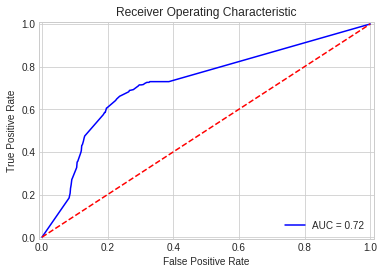

In [83]:
plot_roc_curve(y_test, probs_dt)

In [84]:
# Random Forest Classifier - Random Search for Hyperparameters

# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
# Specify parameters and distributions to sample from
param_dist = {"max_depth": [10, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 20),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Run Randomized Search
n_iter_search = 10
rfc = RandomForestClassifier(n_estimators=10)
random_search = RandomizedSearchCV(rfc, 
                                   n_jobs = -1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 0.63 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.801 (std: 0.010)
Parameters: {'min_samples_split': 3, 'min_samples_leaf': 8, 'bootstrap': True, 'max_features': 9, 'max_depth': 10, 'criterion': 'gini'}

Model with rank: 2
Mean validation score: 0.796 (std: 0.004)
Parameters: {'min_samples_split': 16, 'min_samples_leaf': 10, 'bootstrap': False, 'max_features': 3, 'max_depth': 10, 'criterion': 'entropy'}

Model with rank: 2
Mean validation score: 0.796 (std: 0.003)
Parameters: {'min_samples_split': 5, 'min_samples_leaf': 5, 'bootstrap': True, 'max_features': 4, 'max_depth': 10, 'criterion': 'gini'}

Model with rank: 4
Mean validation score: 0.795 (std: 0.010)
Parameters: {'min_samples_split': 14, 'min_samples_leaf': 7, 'bootstrap': True, 'max_features': 5, 'max_depth': None, 'criterion': 'entropy'}

Model with rank: 4
Mean validation score: 0.795 (std: 0.007)
Parameters: {'min_samples_split': 12, 'min_samples_leaf': 7,

In [85]:
# Random Forest Classifier
start_time = time.time()
rfc = RandomForestClassifier(n_estimators=10, 
                             min_samples_leaf=2,
                             min_samples_split=17, 
                             criterion='gini', 
                             max_features=8)
train_pred_rf, test_pred_rf, acc_rf, acc_cv_rf, probs_rf = fit_ml_algo(rfc, 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)
rf_time = (time.time() - start_time)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)
print("Running Time: %s" % datetime.timedelta(seconds=rf_time))

Accuracy: 79.39
Accuracy CV 10-Fold: 79.32
Running Time: 0:00:00.419326


In [86]:
print (metrics.classification_report(y_train, train_pred_rf)) 

             precision    recall  f1-score   support

          0       0.84      0.89      0.86      3611
          1       0.63      0.51      0.56      1282

avg / total       0.78      0.79      0.79      4893



In [87]:
print (metrics.classification_report(y_test, test_pred_rf)) 

             precision    recall  f1-score   support

          0       0.83      0.90      0.86      1552
          1       0.66      0.51      0.58       588

avg / total       0.78      0.79      0.79      2140



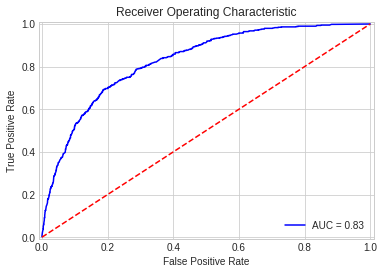

In [88]:
plot_roc_curve(y_test, probs_rf)

In [89]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, test_pred_gbt, acc_gbt, acc_cv_gbt, probs_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 79.25
Accuracy CV 10-Fold: 80.03
Running Time: 0:00:02.248643


In [90]:
print (metrics.classification_report(y_train, train_pred_gbt)) 

             precision    recall  f1-score   support

          0       0.84      0.90      0.87      3611
          1       0.65      0.52      0.58      1282

avg / total       0.79      0.80      0.79      4893



In [91]:
print (metrics.classification_report(y_test, test_pred_gbt)) 

             precision    recall  f1-score   support

          0       0.83      0.90      0.86      1552
          1       0.66      0.52      0.58       588

avg / total       0.78      0.79      0.78      2140



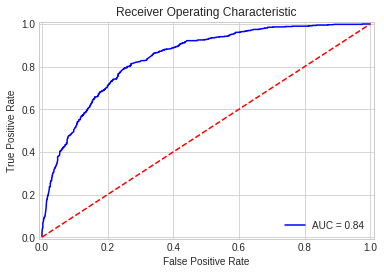

In [92]:
plot_roc_curve(y_test, probs_gbt)

## Ranking Results

Let's rank the results for all the algorithms we have used

In [93]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        acc_knn, 
        acc_log, 
        acc_rf, 
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt
    ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Logistic Regression,79.44
2,Random Forest,79.39
7,Gradient Boosting Trees,79.25
5,Linear SVC,78.93
4,Stochastic Gradient Decent,76.50
6,Decision Tree,76.12
0,KNN,75.79
3,Naive Bayes,68.93


In [94]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,     
        acc_cv_rf, 
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt
    ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Logistic Regression,80.26
5,Linear SVC,80.24
7,Gradient Boosting Trees,80.03
2,Random Forest,79.32
6,Decision Tree,74.80
0,KNN,74.35
4,Stochastic Gradient Decent,72.25
3,Naive Bayes,69.63


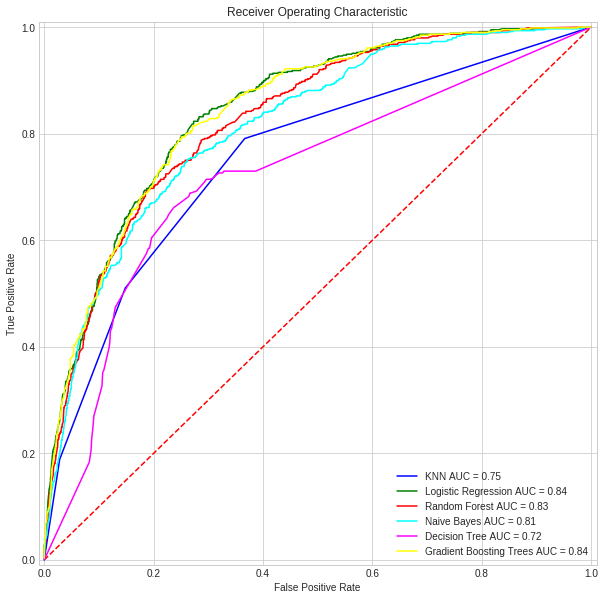

In [95]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,10)) 

models = [
    'KNN', 
    'Logistic Regression', 
    'Random Forest', 
    'Naive Bayes', 
    'Decision Tree', 
    'Gradient Boosting Trees'
]
probs = [
    probs_knn,
    probs_log,
    probs_rf,
    probs_gau,
    probs_dt,
    probs_gbt
]
colors = [
    'blue',
    'green',
    'red',
    'cyan',
    'magenta',
    'yellow',
]
    
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

def plot_roc_curves(y_test, prob, model):
    fpr, tpr, threshold = metrics.roc_curve(y_test, prob)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.2f' % roc_auc, color=colors[i])
    plt.legend(loc = 'lower right')
    
for i, model in list(enumerate(models)):
    plot_roc_curves(y_test, probs[i], models[i])
    
plt.show()

## Simple Logistic Regression and Gradient Boosting Trees performed better than the other ML algorithms.

# Trying with Tensorflow + Keras - Logistic Regression


Using TensorFlow backend.


Epoch 1/100
4893/4893 [==============================] - 0s 72us/step - loss: 0.6663 - acc: 0.7347
Epoch 2/100
4893/4893 [==============================] - 0s 24us/step - loss: 0.5049 - acc: 0.7380
Epoch 3/100
4893/4893 [==============================] - 0s 23us/step - loss: 0.4438 - acc: 0.7380
Epoch 4/100
4893/4893 [==============================] - 0s 24us/step - loss: 0.4359 - acc: 0.7380
Epoch 5/100
4893/4893 [==============================] - 0s 24us/step - loss: 0.4308 - acc: 0.7380
Epoch 6/100
4893/4893 [==============================] - 0s 23us/step - loss: 0.4272 - acc: 0.7380
Epoch 7/100
4893/4893 [==============================] - 0s 23us/step - loss: 0.4252 - acc: 0.7623
Epoch 8/100
4893/4893 [==============================] - 0s 23us/step - loss: 0.4236 - acc: 0.7997
Epoch 9/100
4893/4893 [==============================] - 0s 23us/step - loss: 0.4221 - acc: 0.8032
Epoch 10/100
4893/4893 [==============================] - 0s 23us/step - loss: 0.4208 - acc: 0.8056
Epoch 11/

4893/4893 [==============================] - 0s 23us/step - loss: 0.3946 - acc: 0.8152
Epoch 84/100
4893/4893 [==============================] - 0s 25us/step - loss: 0.3943 - acc: 0.8146
Epoch 85/100
4893/4893 [==============================] - 0s 24us/step - loss: 0.3945 - acc: 0.8171
Epoch 86/100
4893/4893 [==============================] - 0s 24us/step - loss: 0.3940 - acc: 0.8132
Epoch 87/100
4893/4893 [==============================] - 0s 25us/step - loss: 0.3942 - acc: 0.8157
Epoch 88/100
4893/4893 [==============================] - 0s 24us/step - loss: 0.3942 - acc: 0.8159
Epoch 89/100
4893/4893 [==============================] - 0s 27us/step - loss: 0.3940 - acc: 0.8179
Epoch 90/100
4893/4893 [==============================] - 0s 28us/step - loss: 0.3938 - acc: 0.8148
Epoch 91/100
4893/4893 [==============================] - 0s 26us/step - loss: 0.3937 - acc: 0.8138
Epoch 92/100
4893/4893 [==============================] - 0s 27us/step - loss: 0.3937 - acc: 0.8157
Epoch 93/100


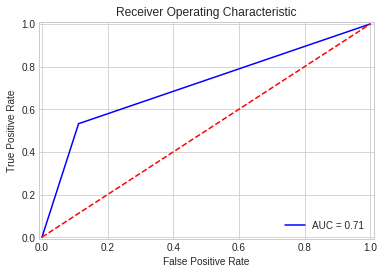

In [96]:
# Splitting the dataset into the Training set and Test set
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 33))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 50, nb_epoch = 100)

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

# Making Classification Report
target_names = ['Churn = No', 'Churn = Yes']
print('Classification Report:\n', classification_report(y_test, y_pred, target_names=target_names))

# Making ROC Curve and AUC
print('AUC:', roc_auc_score(y_test, y_pred))
plot_roc_curve(y_test, y_pred)

# Model Evaluation
#test_loss, test_acc = classifier.evaluate(y_test, y_pred)
#print('Test accuracy:', test_acc)


## Tensorflow did worst than the regular ML Algorithms